In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
df = pd.DataFrame(data=iris.data, 
                  columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [26]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

In [27]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [28]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [29]:
#cov_pca.eigen_vectors
pca.eigen_vectors

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [30]:
pca.eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [31]:
pca.sorted_components

array([0, 1, 2, 3], dtype=int64)

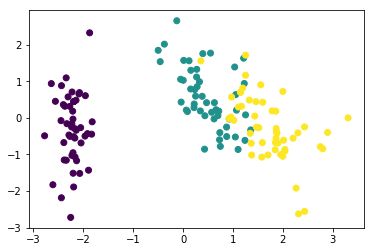

In [32]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()